In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bike = pd.read_excel('/content/Bike_Price_Prediction.xlsx')

In [ ]:
bike.shape

(308, 10)

In [ ]:
bike.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    object 
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 24.2+ KB


In [ ]:
bike.isnull().sum()

,0
S.no,0
Bike_company,0
Bike_model,0
Manufactured_year,0
Engine_warranty,2
Engine_type,0
Fuel_type,0
CC(Cubic capacity),0
Fuel_Capacity,1
Price,0


In [ ]:
bike.describe()

,S.no,Manufactured_year,Engine_warranty,Price
count,308.000000,308.000000,306.000000,3.080000e+02
mean,154.496753,2010.847403,6.032680,2.548416e+05
std,89.059088,104.747343,3.719542,2.950174e+05
min,1.000000,202.000000,2.000000,5.000000e+04
25%,77.750000,2017.000000,4.000000,7.500000e+04
50%,154.500000,2019.000000,5.000000,1.045000e+05
75%,231.250000,2020.000000,8.000000,3.412500e+05
max,308.000000,2050.000000,50.000000,1.779990e+06


In [ ]:
bike.duplicated().sum()

0

In [ ]:
bike.drop(columns=['S.no'],inplace=True)

In [ ]:
bike.rename(columns={'Bike_company': 'company'}, inplace=True)

In [ ]:
bike.rename(columns={'Bike_model':'model'},inplace=True)


In [ ]:
bike.rename(columns={'Manufactured_year':'year'},inplace=True)

In [ ]:
bike.rename(columns={'CC(Cubic capacity)':'Cubic_capacity'},inplace=True)

In [ ]:
bike['Engine_warranty'].fillna(bike['Engine_warranty'].mean(), inplace=True)

<ipython-input-19-37cfa73b6e10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike['Engine_warranty'].fillna(bike['Engine_warranty'].mean(), inplace=True)


In [ ]:
bike.dropna(inplace=True)

In [ ]:
# Replace any alphabetic characters in the 'CC(Cubic capacity)' and 'Fuel_Capacity' columns with an empty string
# The 'regex=True' parameter allows the use of regular expressions to match alphabetic characters
# 'inplace=True' modifies the 'bike' DataFrame directly without returning a new DataFrame
#bike.replace({
#    'CC(Cubic capacity)': '[A-Za-z]',  # Regex pattern to match any alphabetic character in this column
#    'Fuel_Capacity': '[A-Za-z]'        # Regex pattern to match any alphabetic character in this column
#}, '', regex=True, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
#bike.head()


In [ ]:
# Extract numeric values from 'Cubic_capacity' and remove any non-numeric characters
bike['Cubic_capacity'] = bike['Cubic_capacity'].str.extract('(\d+)')

# Convert 'Cubic_capacity' to integers (after ensuring only numeric values remain)
bike['Cubic_capacity'] = bike['Cubic_capacity'].astype(int)

# Similarly, extract numeric values from 'Fuel_Capacity'
bike['Fuel_Capacity'] = bike['Fuel_Capacity'].str.extract('(\d+)')

# Drop rows with NaN values in 'Fuel_Capacity'
bike = bike.dropna(subset=['Fuel_Capacity'])

# Convert 'Fuel_Capacity' to integers
bike['Fuel_Capacity'] = bike['Fuel_Capacity'].astype(int)

# Display the first few rows of the cleaned DataFrame
bike.head()


<ipython-input-22-13cb72e9ce84>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['Fuel_Capacity'] = bike['Fuel_Capacity'].astype(int)


,company,model,year,Engine_warranty,Engine_type,Fuel_type,Cubic_capacity,Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14,65000


In [ ]:
bike['Engine_warranty'].unique()

array([ 5.        , 10.        ,  2.        ,  4.        ,  6.03267974,
        6.        ,  7.        ,  8.        ,  3.        ,  9.        ,
       12.        , 13.        , 14.        ])

In [ ]:
# Round the 'Engine_warranty' to one decimal place
bike['Engine_warranty'] = bike['Engine_warranty'].round(1)

# Verify the correction
print(bike['Engine_warranty'].unique())

[ 5. 10.  2.  4.  6.  7.  8.  3.  9. 12. 13. 14.]


In [ ]:
bike.shape

(267, 9)

In [ ]:
bike.drop(columns=['model','year'],inplace=True)

#cleaned data

In [ ]:
bike

,company,Engine_warranty,Engine_type,Fuel_type,Cubic_capacity,Fuel_Capacity,Price
0,Bajaj,5.0,Single,Petrol,220,10,113000
1,TVS,5.0,V-twin,Petrol,120,11,70000
2,Hero,5.0,Boxer,Petrol,140,12,85000
3,Honda,5.0,Single,Petrol,150,13,90000
4,Suzuki,5.0,V-twin,Petrol,350,14,65000
...,...,...,...,...,...,...,...
303,Bgauss,3.0,Boxer,Petrol,185,19,81916
304,Bgauss,3.0,Boxer,Petrol,205,20,82666
305,Bgauss,3.0,Boxer,Petrol,185,21,83416
306,Bgauss,3.0,Boxer,Petrol,205,22,84166


In [ ]:
bike.to_csv('cleaned_bike_data.csv', index=False) # Call the to_csv method on the DataFrame 'bike'

In [ ]:
bike = pd.read_csv('/content/cleaned_bike_data.csv')

In [ ]:
bike.head()

,company,Engine_warranty,Engine_type,Fuel_type,Cubic_capacity,Fuel_Capacity,Price
0,Bajaj,5.0,Single,Petrol,220,10,113000
1,TVS,5.0,V-twin,Petrol,120,11,70000
2,Hero,5.0,Boxer,Petrol,140,12,85000
3,Honda,5.0,Single,Petrol,150,13,90000
4,Suzuki,5.0,V-twin,Petrol,350,14,65000


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          267 non-null    object 
 1   Engine_warranty  267 non-null    float64
 2   Engine_type      267 non-null    object 
 3   Fuel_type        267 non-null    object 
 4   Cubic_capacity   267 non-null    int64  
 5   Fuel_Capacity    267 non-null    int64  
 6   Price            267 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 14.7+ KB


In [ ]:
bike.describe()

,Engine_warranty,Cubic_capacity,Fuel_Capacity,Price
count,267.000000,267.000000,267.000000,2.670000e+02
mean,6.198502,325.464419,19.520599,2.827780e+05
std,2.736882,229.903824,4.356586,3.072993e+05
min,2.000000,100.000000,10.000000,5.470000e+04
25%,4.000000,155.000000,17.000000,8.070800e+04
50%,5.000000,250.000000,19.000000,1.345000e+05
75%,8.000000,400.000000,22.000000,3.699990e+05
max,14.000000,1350.000000,35.000000,1.779990e+06


In [ ]:
#sns.boxplot(bike['Price'],orient='h')

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
#Q1 = bike['Price'].quantile(0.25)
#Q3 = bike['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
#IQR = Q3 - Q1

# Set the lower and upper bounds for outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

In [ ]:
#lower_bound

In [ ]:
#upper_bound

In [ ]:
# Filter the data to remove outliers
#bike = bike[(bike['Price'] >= lower_bound) & (bike['Price'] <= upper_bound)]

In [ ]:
#sns.boxplot(bike['Price'],orient='h')

In [ ]:
# Display summary statistics of the filtered data
#bike.describe()

In [ ]:
bike['company'].unique()

array(['Bajaj', 'TVS', 'Hero', 'Honda', 'Suzuki', 'Royal Enfield',
       'Yamaha', 'KTM', 'Mahindra', 'Kawasaki', 'Ducati', 'BMW',
       'Banelli', 'Harley Davidson', 'Revolt Motors', 'CFMoto', 'Triumph',
       'Jawa', '22Kymco', 'Okinawa', 'Bgauss'], dtype=object)

<ipython-input-41-ab2b18b1f110>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


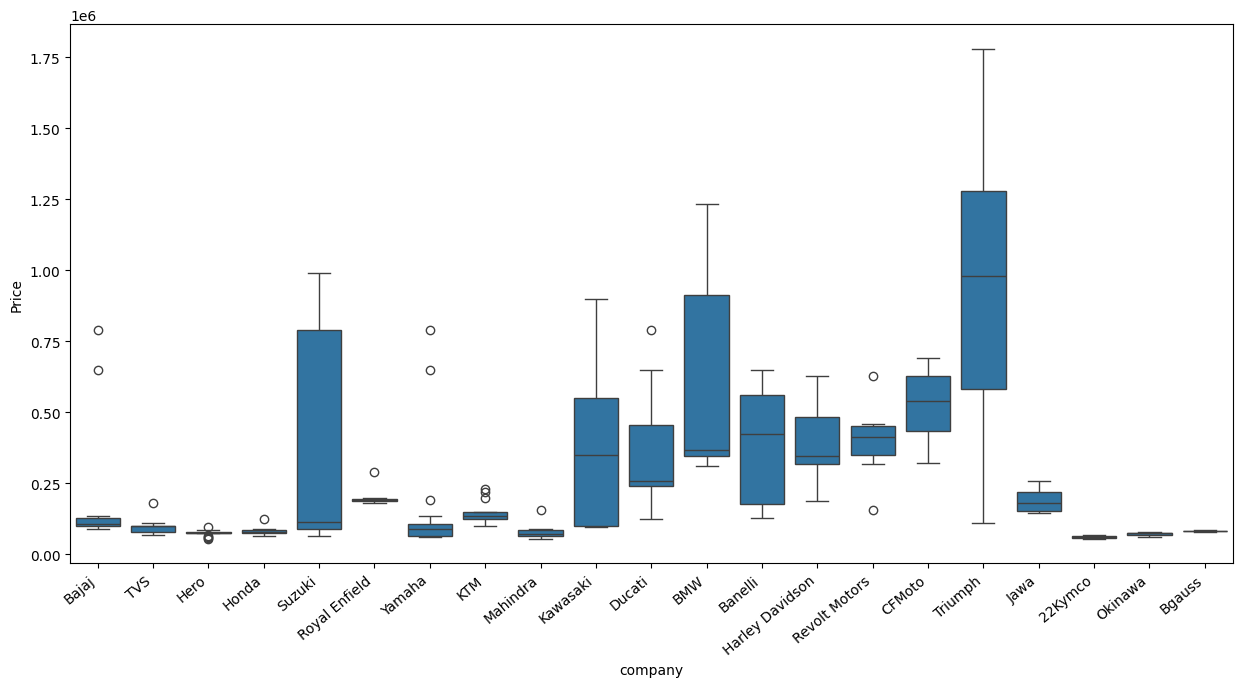

In [ ]:
import seaborn as sns
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=bike)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<ipython-input-42-4297f499dfc1>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


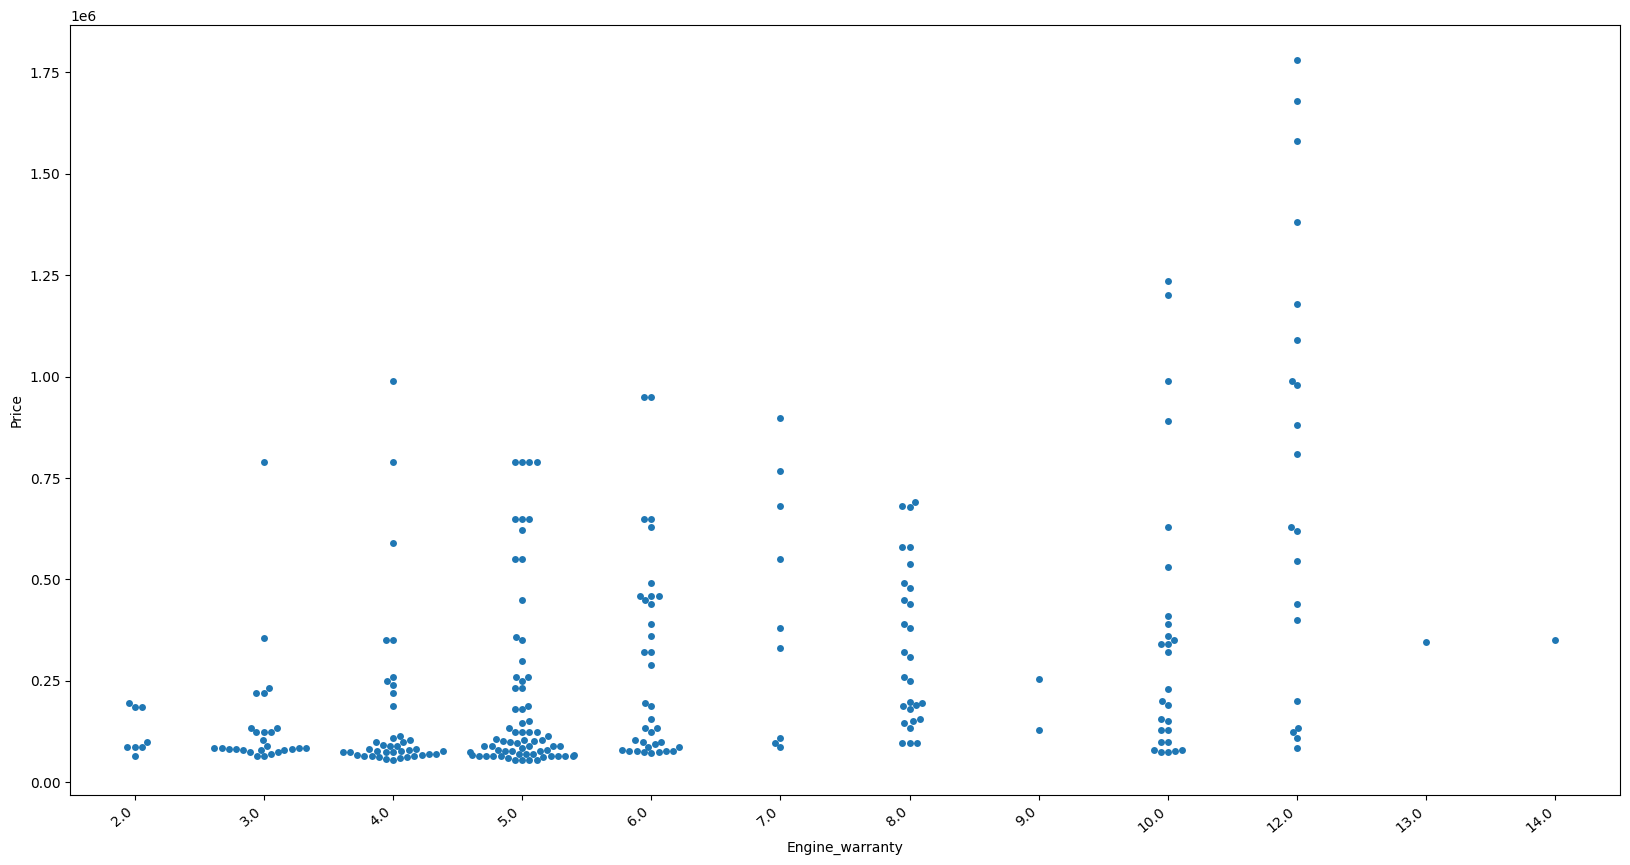

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Engine_warranty',y='Price',data=bike)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<ipython-input-43-ff6a1310627b>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


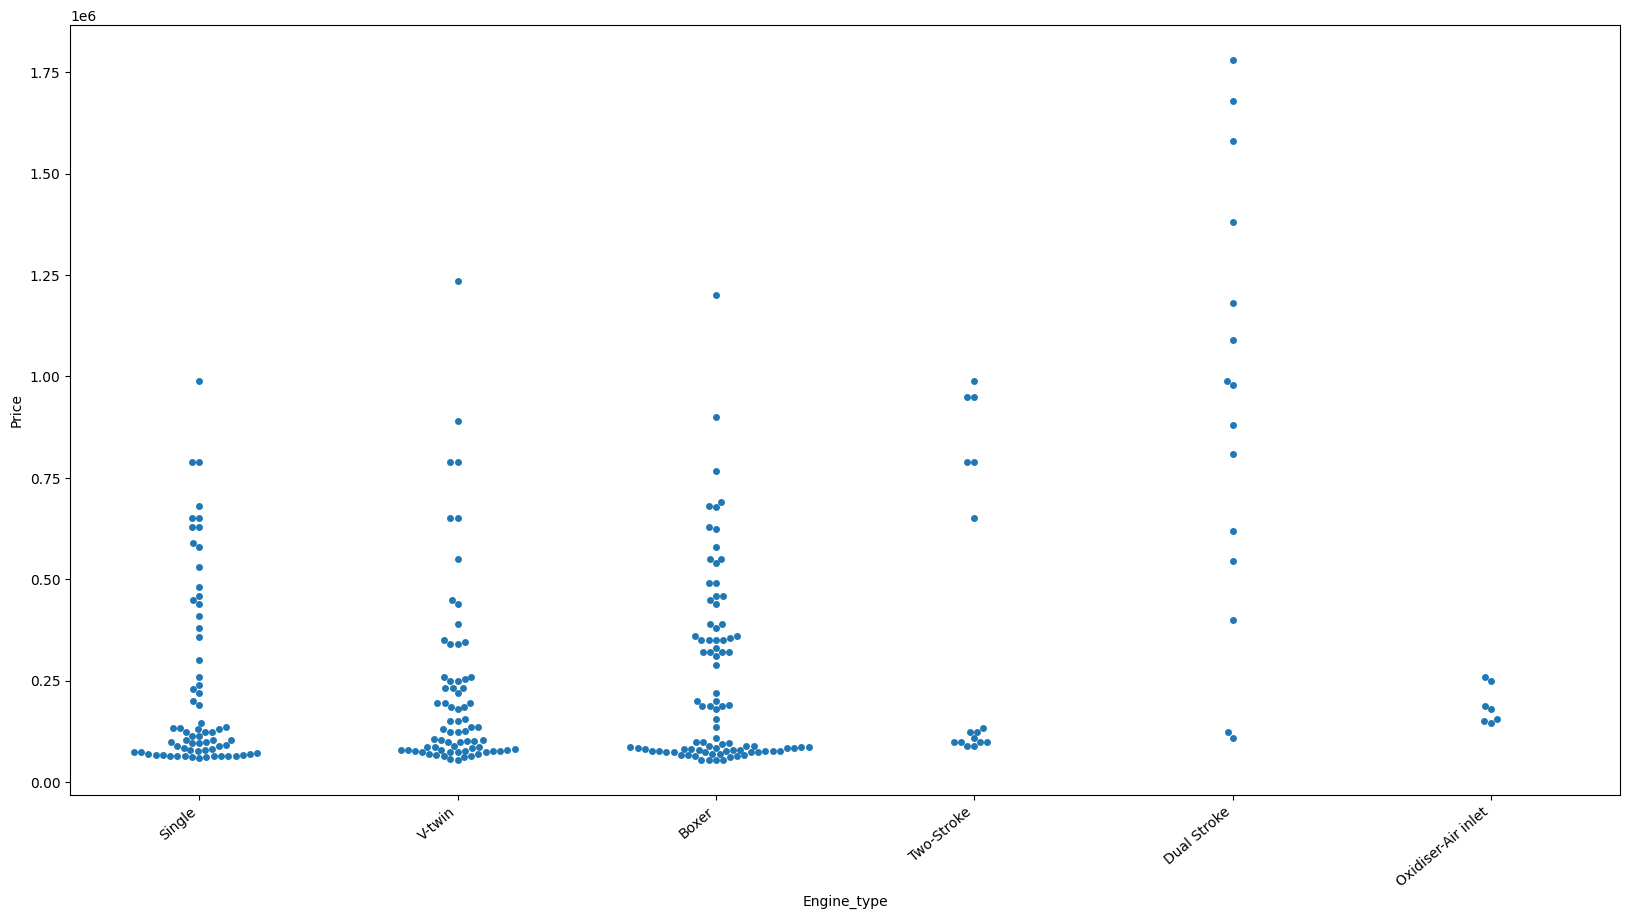

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Engine_type',y='Price',data=bike)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<ipython-input-44-ff6a1310627b>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


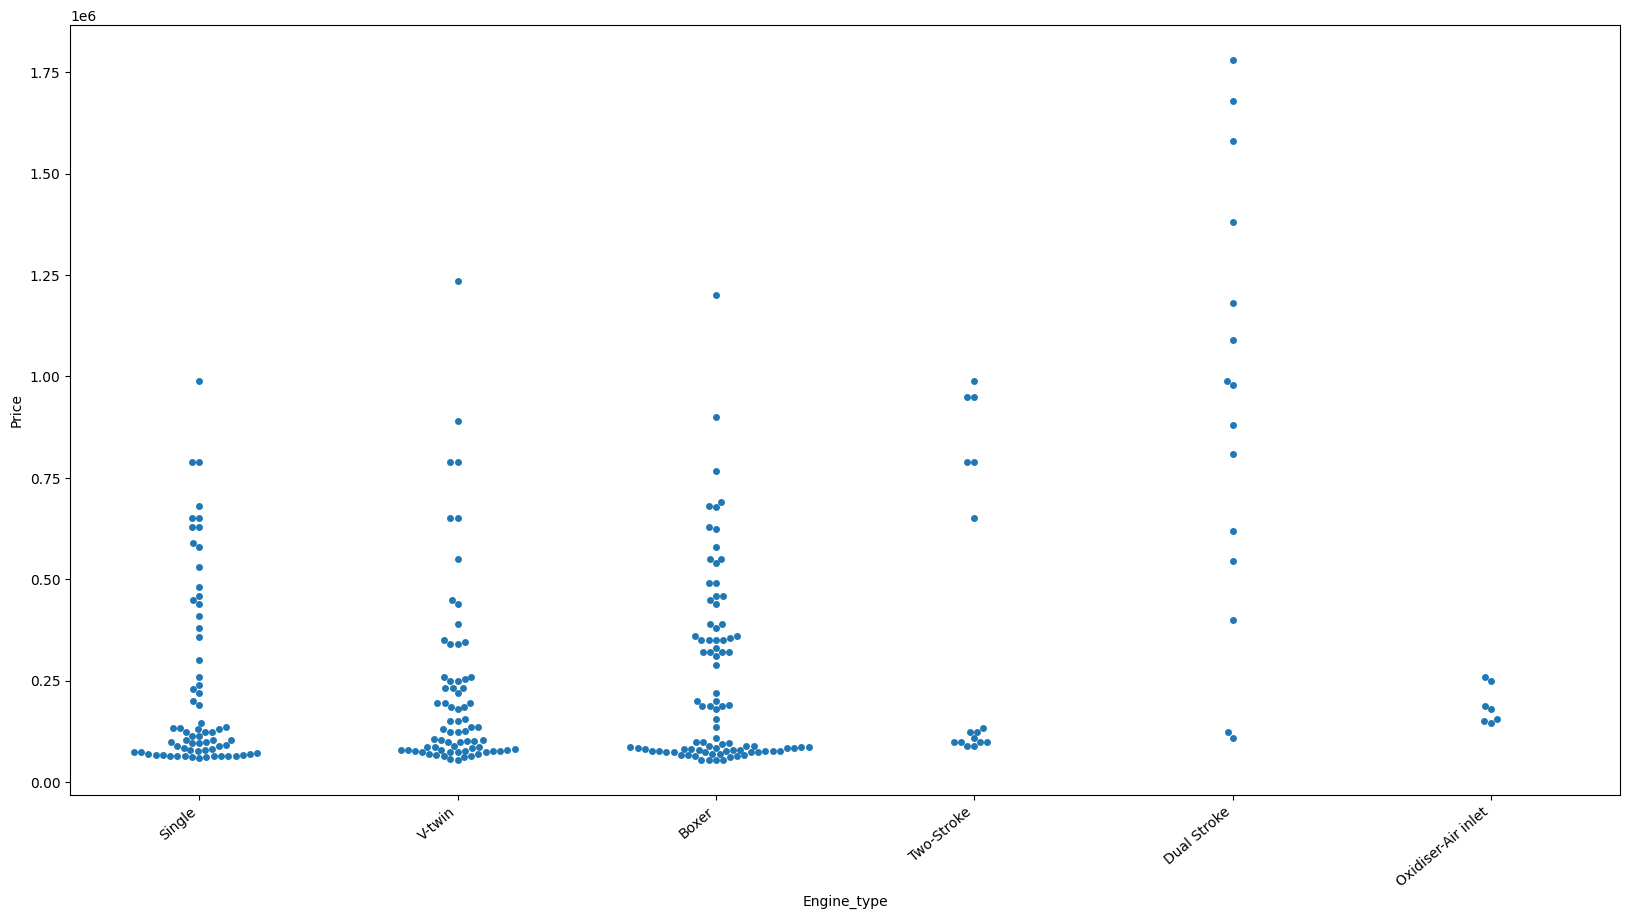

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Engine_type',y='Price',data=bike)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<ipython-input-45-27162aa7b390>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


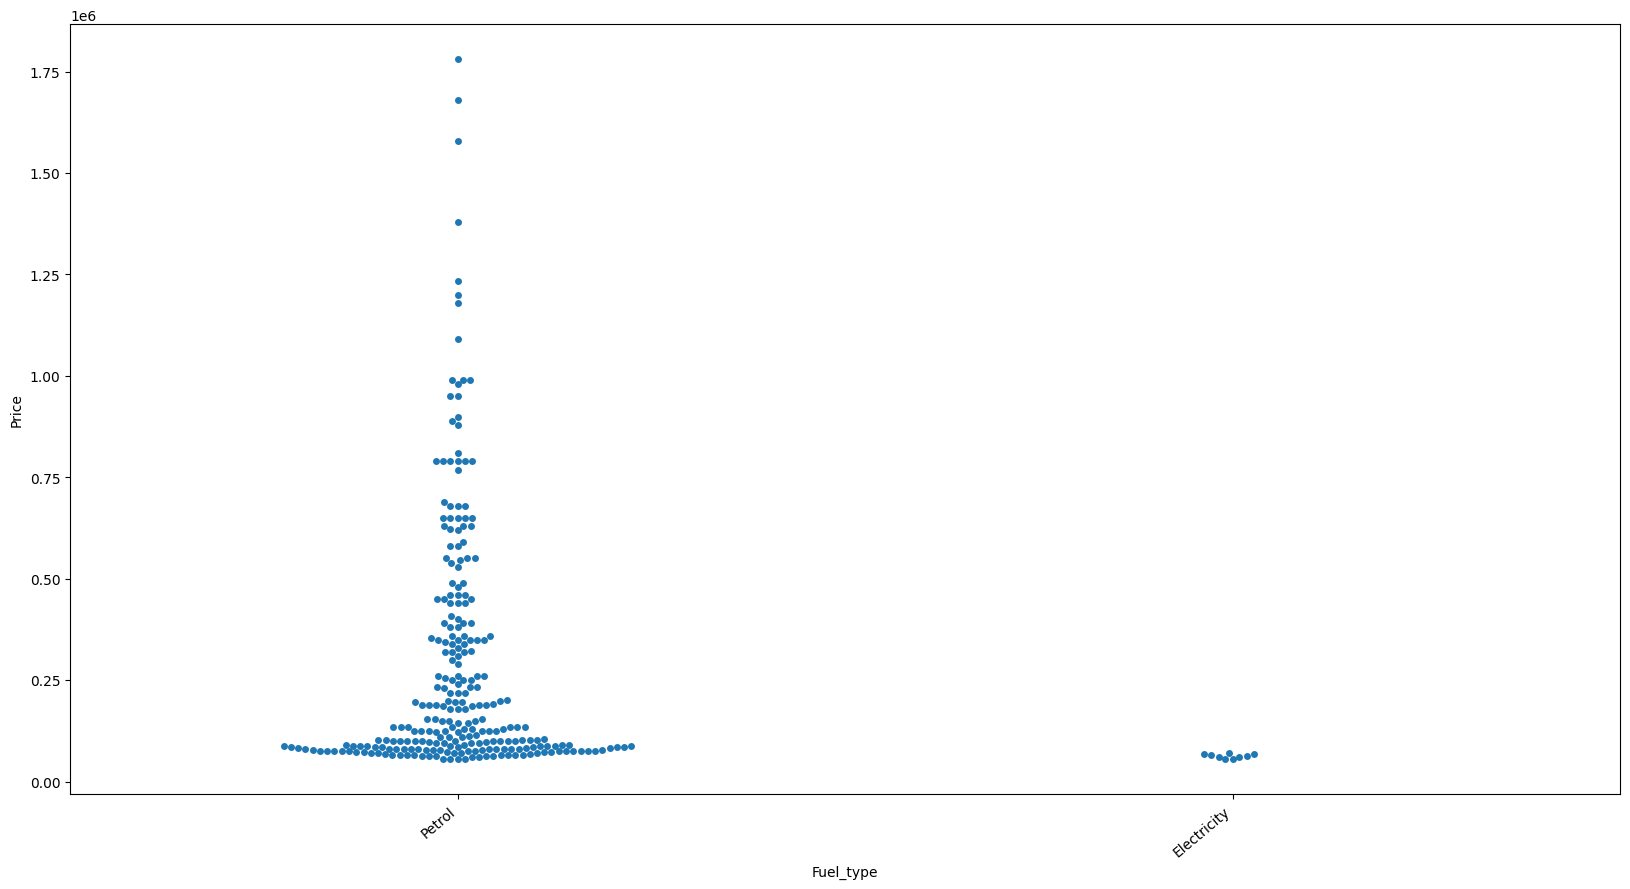

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Fuel_type',y='Price',data=bike)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be plac

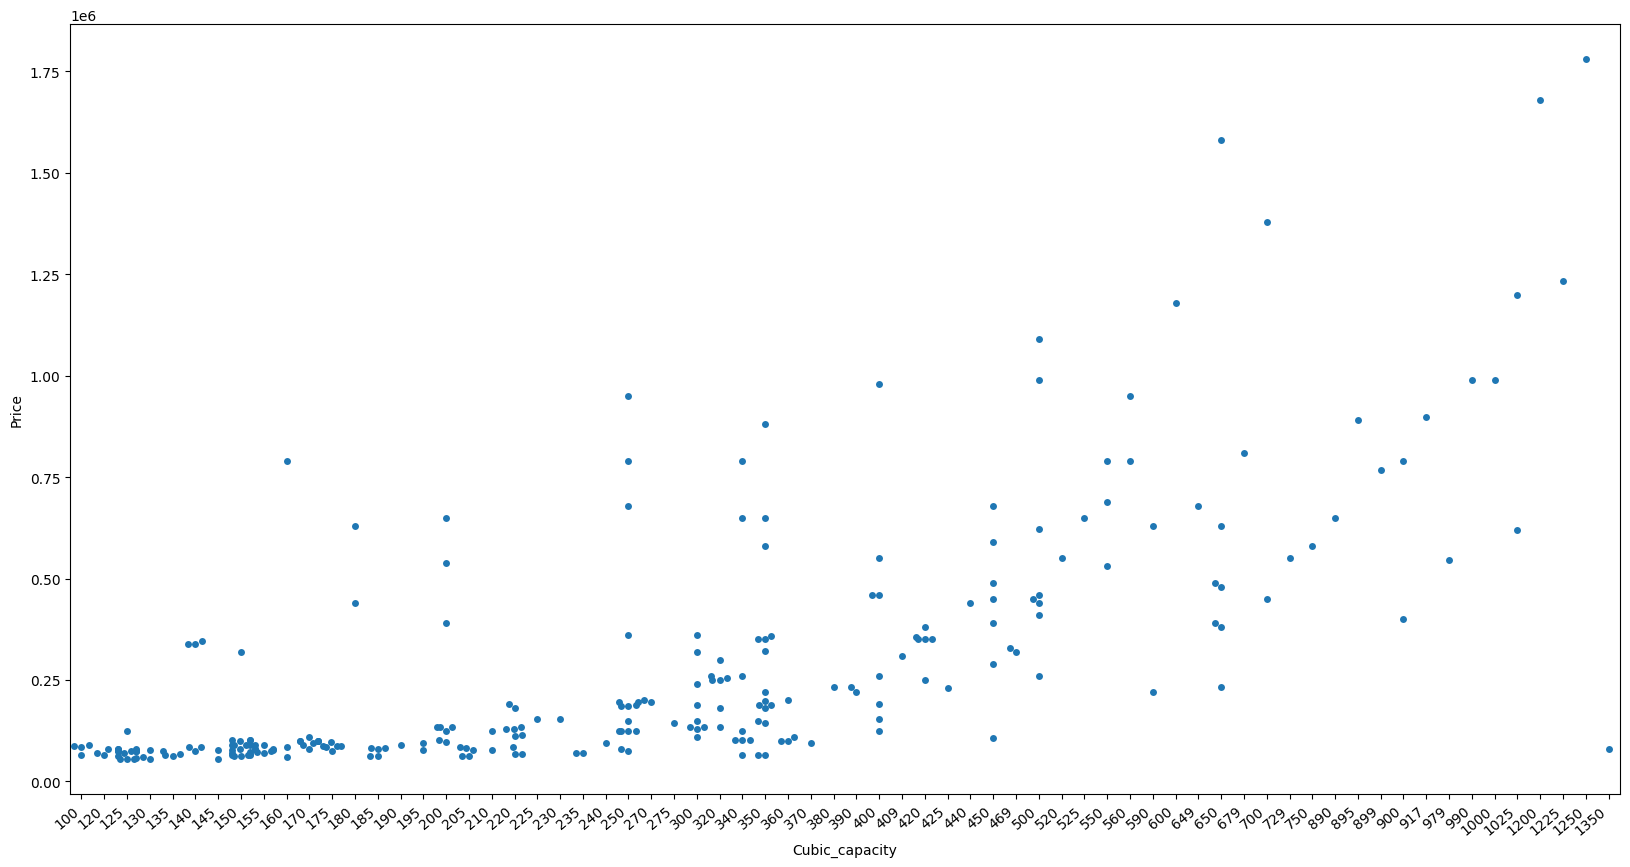

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Cubic_capacity',y='Price',data=bike)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<Axes: xlabel='Fuel_type', ylabel='Price'>

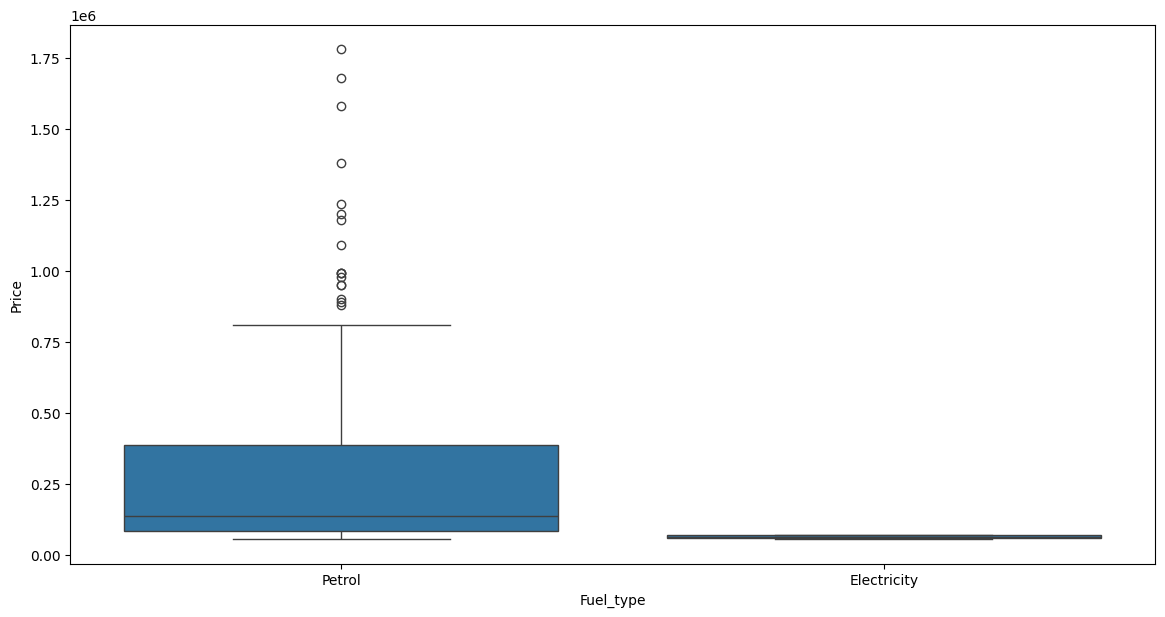

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_type',y='Price',data=bike)

<Axes: xlabel='Fuel_Capacity', ylabel='Price'>

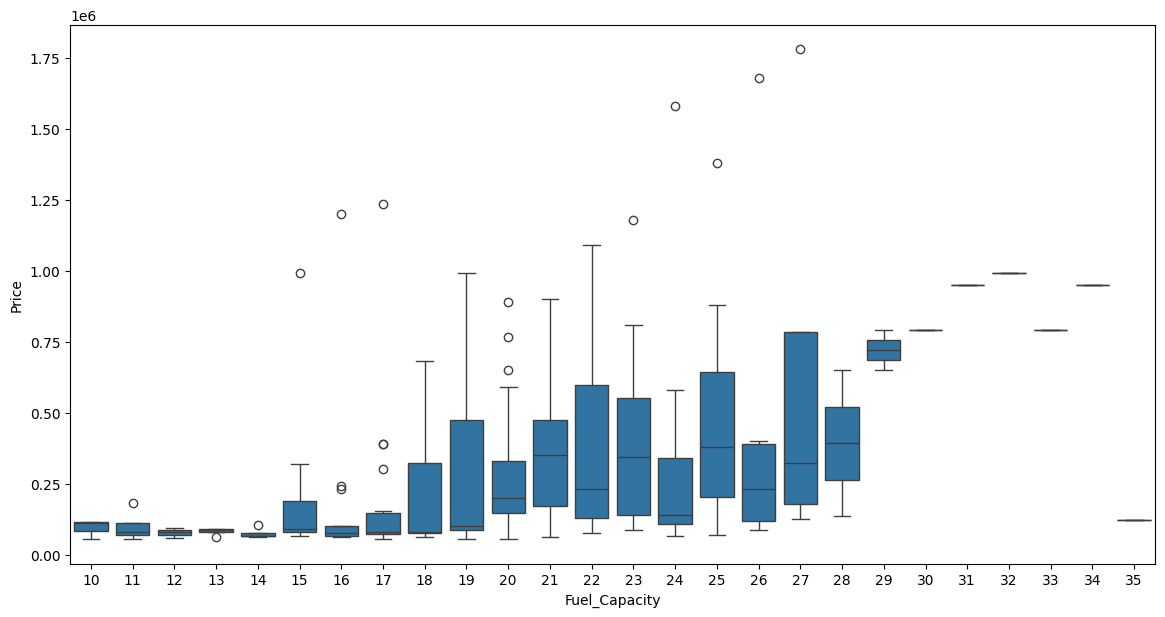

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Capacity',y='Price',data=bike)

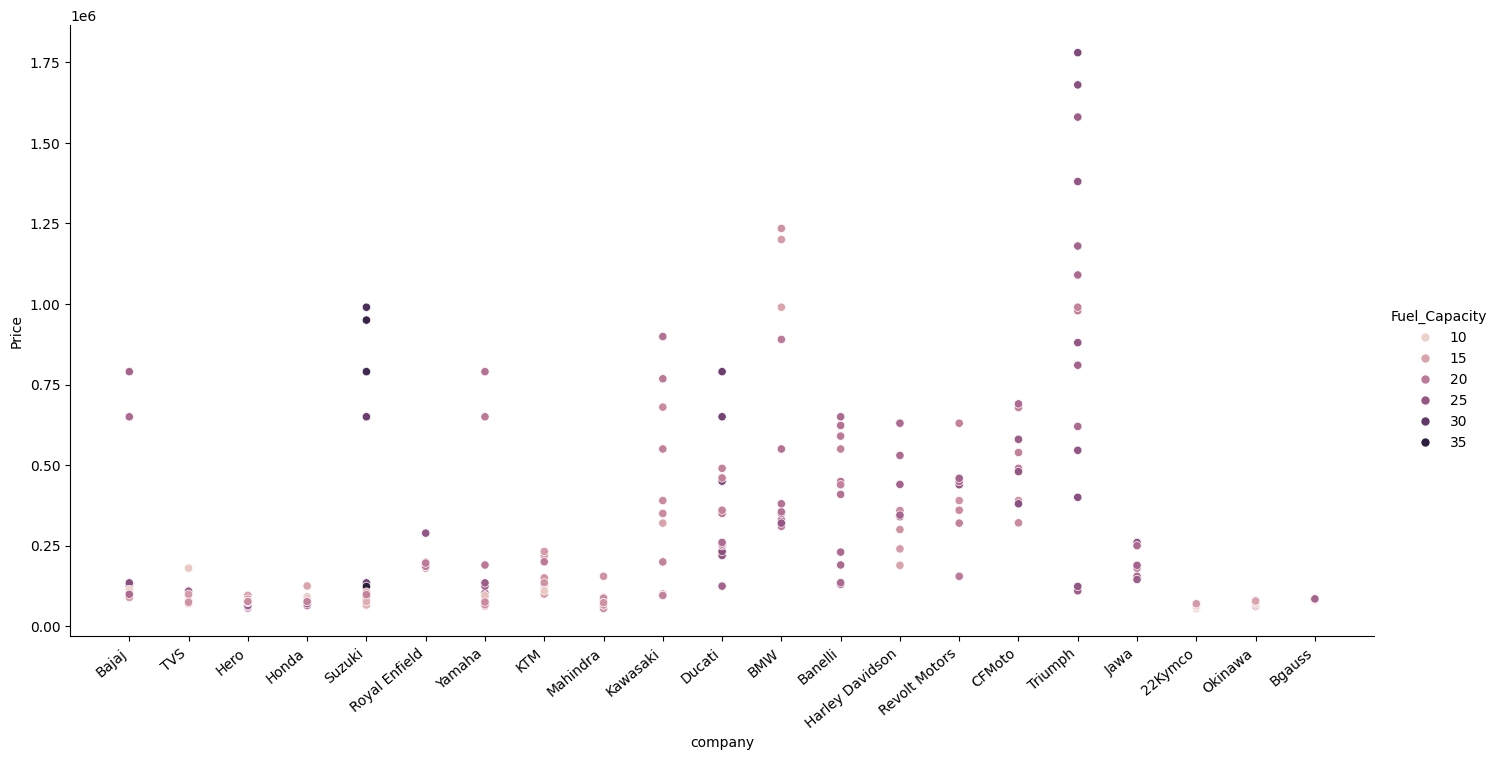

In [ ]:
ax=sns.relplot(x='company',y='Price',data=bike,hue='Fuel_Capacity',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

#Extracting Training Data

In [ ]:
X = bike.drop(columns='Price')
y = bike['Price']

In [ ]:
X

,company,Engine_warranty,Engine_type,Fuel_type,Cubic_capacity,Fuel_Capacity
0,Bajaj,5.0,Single,Petrol,220,10
1,TVS,5.0,V-twin,Petrol,120,11
2,Hero,5.0,Boxer,Petrol,140,12
3,Honda,5.0,Single,Petrol,150,13
4,Suzuki,5.0,V-twin,Petrol,350,14
...,...,...,...,...,...,...
262,Bgauss,3.0,Boxer,Petrol,185,19
263,Bgauss,3.0,Boxer,Petrol,205,20
264,Bgauss,3.0,Boxer,Petrol,185,21
265,Bgauss,3.0,Boxer,Petrol,205,22


In [ ]:
y

,Price
0,113000
1,70000
2,85000
3,90000
4,65000
...,...
262,81916
263,82666
264,83416
265,84166


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((213, 6), (54, 6), (213,), (54,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
ohe = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')
ohe.fit(X[['company','Engine_type','Fuel_type']])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [ ]:
column_trans = ColumnTransformer([(
    'ohe',  # Give it a name
    ohe,  # Use the fitted ohe object directly
    ['company', 'Engine_type', 'Fuel_type']
)], remainder='passthrough')

#RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
from sklearn.pipeline import Pipeline
# Wrap your steps in a list of (name, estimator) tuples
pipe = Pipeline([('column_trans', column_trans), ('rf', rf)])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['company', 'Engine_type',
                                                   'Fuel_type'])])),
                ('rf', RandomForestRegressor())])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.2464842814479976

In [ ]:
scores=[]
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    rf=RandomForestRegressor()
    pipe = Pipeline([('column_trans', column_trans), ('rf', rf)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

84

In [ ]:
scores[np.argmax(scores)]

0.9343313159571783

In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Bajaj','5.0','Single','Petrol','220','10']).reshape(1,6)))

array([120678.15])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
rf=RandomForestRegressor()
pipe = Pipeline([('column_trans', column_trans), ('rf', rf)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9282440712109111

In [ ]:
import pickle
pickle.dump(pipe,open('RandomForestRegressionModel.pkl','wb'))
pickle.dump(bike,open('bike.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['company','Engine_warranty','Engine_type','Fuel_type','Cubic_capacity','Fuel_Capacity'],data=np.array(['Bajaj','5.0','Single','Petrol','220','10']).reshape(1,6)))

array([132985.66])

In [ ]:
!pip install streamlit -q

In [ ]:
! wget -q -O - ipv4.icanhazip.com

35.243.172.39


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.172.39:8501

your url is: https://busy-bananas-kneel.loca.lt
2024-10-23 04:57:26.115 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 7, in <module>
    model = pickle.load(open('LinearRegression.pkl', 'rb'))
FileNotFoundError: [Errno 2] No such file or directory: 'LinearRegression.pkl'
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as al